# Machine Learning

In [1]:
#Importing Necessary Packages
import plotly
from pmdarima import auto_arima
from statsmodels.tsa.arima_model import ARIMA
import numpy as np
import matplotlib.pyplot as plt
import quandl
import chart_studio.plotly as ply
import cufflinks as cf
from plotly.offline import init_notebook_mode, plot, iplot
from datetime import datetime
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
import pandas as pd

In [2]:
# Bringing in Data from Data Wrangling
BA = pd.read_pickle('BAdata.pickle')

In [3]:
BA.head()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,...,IvMean360,IvMeanSkew360,IvCall720,IvPut720,IvMean720,IvMeanSkew720,IvCall1080,IvPut1080,IvMean1080,IvMeanSkew1080
Date,,,,,,,,,,,,,,,,,,,,,
2017-12-28,295.810,296.9900,294.7400,296.35,1436543.0,0.0,1.0,281.849760,282.974072,280.830256,...,0.2224,0.0175,0.1940,0.2680,0.2310,0.0105,0.1933,0.2697,0.2315,0.0099
2017-12-27,296.410,296.8000,294.8000,295.62,1447837.0,0.0,1.0,282.421444,282.793038,280.887425,...,0.2260,0.0161,0.2000,0.2641,0.2320,0.0196,0.1996,0.2650,0.2323,0.0199
2017-12-26,295.540,297.4400,294.6500,295.36,1394737.0,0.0,1.0,281.592502,283.402835,280.744504,...,0.2265,0.0173,0.1993,0.2704,0.2348,0.0187,0.1986,0.2720,0.2353,0.0189
2017-12-22,295.135,296.5200,293.0100,295.10,2257000.0,0.0,1.0,281.206615,282.526252,279.181901,...,0.2284,0.0179,0.1999,0.2656,0.2328,0.0186,0.1991,0.2665,0.2328,0.0188
2017-12-21,298.040,298.3852,294.1301,295.03,5395193.0,0.0,1.0,283.974519,284.303428,280.249140,...,0.2176,0.0188,0.2002,0.2608,0.2305,0.0165,0.1996,0.2641,0.2318,0.0164


In [4]:
#reset index to change order of data 
BA1 = BA.sort_index(ascending=True)
BA1 = BA1.reset_index()
BA1 = BA1.set_index('Date')

In [5]:
#Regression Packages
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [6]:
m = ols('Hv10 ~ IvMean10', BA1).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                   Hv10   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     256.0
Date:                Thu, 15 Oct 2020   Prob (F-statistic):           6.79e-52
Time:                        12:23:52   Log-Likelihood:                 1093.1
No. Observations:                1088   AIC:                            -2182.
Df Residuals:                    1086   BIC:                            -2172.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0082      0.011      0.731      0.4

In [7]:
BA1.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividend', 'Split',
       'Adj_Open', 'Adj_High', 'Adj_Low', 'Adj_Close', 'Adj_Volume', 'Hv10',
       'Hv20', 'Hv30', 'Hv60', 'Hv90', 'Hv120', 'Hv150', 'Hv180', 'Phv10',
       'Phv20', 'Phv30', 'Phv60', 'Phv90', 'Phv120', 'Phv150', 'Phv180',
       'IvCall10', 'IvPut10', 'IvMean10', 'IvMeanSkew10', 'IvCall20',
       'IvPut20', 'IvMean20', 'IvMeanSkew20', 'IvCall30', 'IvPut30',
       'IvMean30', 'IvMeanSkew30', 'IvCall60', 'IvPut60', 'IvMean60',
       'IvMeanSkew60', 'IvCall90', 'IvPut90', 'IvMean90', 'IvMeanSkew90',
       'IvCall120', 'IvPut120', 'IvMean120', 'IvMeanSkew120', 'IvCall150',
       'IvPut150', 'IvMean150', 'IvMeanSkew150', 'IvCall180', 'IvPut180',
       'IvMean180', 'IvMeanSkew180', 'IvCall270', 'IvPut270', 'IvMean270',
       'IvMeanSkew270', 'IvCall360', 'IvPut360', 'IvMean360', 'IvMeanSkew360',
       'IvCall720', 'IvPut720', 'IvMean720', 'IvMeanSkew720', 'IvCall1080',
       'IvPut1080', 'IvMean1080', 'IvMeanSk

In [8]:
m = ols('Hv10 ~ IvMean10 + IvMean20 + Phv10 + Adj_Volume + IvMeanSkew10 + Hv20', BA1).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                   Hv10   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     378.4
Date:                Thu, 15 Oct 2020   Prob (F-statistic):          1.68e-261
Time:                        12:24:00   Log-Likelihood:                 1593.5
No. Observations:                1088   AIC:                            -3173.
Df Residuals:                    1081   BIC:                            -3138.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0215      0.008     -2.583   

I performed two regression models here. The second one I added much more features. The first involves 10 days implied volatility while the 2nd involves many features. The 2nd model performs better with higher R-squres and better AIC and BIC scores.

In [9]:
#Making a new df of the date and historical 10 day volatility
BA2 = BA1[['Hv10']].copy()
BA2.head()

,Hv10
Date,
2013-09-03,0.2010
2013-09-04,0.2156
2013-09-05,0.2157
2013-09-06,0.1523
2013-09-09,0.1549


In [98]:
#Split my training and test data with training being 2013-2016 and 2017
train = BA2['2013': '2016']
test = BA2['2017']

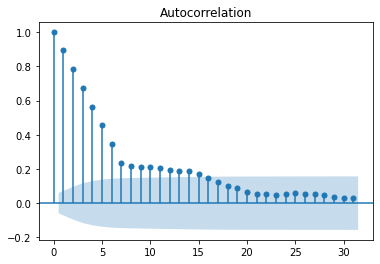

In [11]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(BA2)
plt.show()

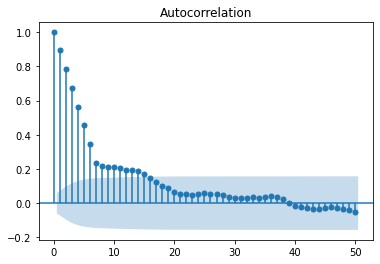

In [12]:
plot_acf(BA2, lags = 50)
plt.show()

Autocorrelation, also known as serial correlation, is the correlation of a signal with a delayed copy of itself as a function of delay. Informally, it is the similarity between observations as a function of the time lag between them. Autocorrelation shows positive and very good correlation and then slows down as we expand. 

[]

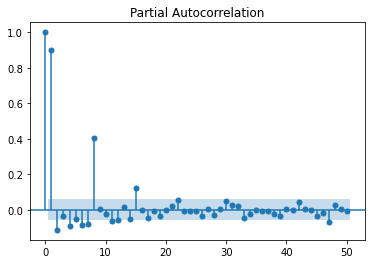

In [13]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(BA2, lags = 50)
plt.plot()

In time series analysis, the partial autocorrelation function gives the partial correlation of a stationary time series with its own lagged values, regressed the values of the time series at all shorter lags. It contrasts with the autocorrelation function, which does not control for other lags.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                             ARIMA Model Results                              
Dep. Variable:                 D.Hv10   No. Observations:                  839
Model:                 ARIMA(2, 1, 2)   Log Likelihood                1455.326
Method:                       css-mle   S.D. of innovations              0.043
Date:                Thu, 15 Oct 2020   AIC                          -2898.651
Time:                        12:24:56   BIC                          -2870.258
Sample:                             1   HQIC                         -2887.768
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.175e-05   4.86e-05      0.242      0.809   -8.35e-05       0.000
ar.L1.D.Hv10     1.5428      0.139     11.128      0.000       1.271       1.815
ar.L2.D.Hv10    -0.5971      0.124     -4.83

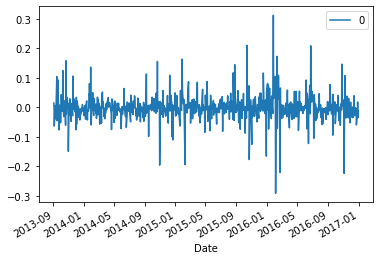

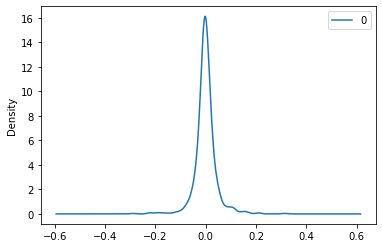

                0
count  839.000000
mean    -0.000120
std      0.042715
min     -0.291639
25%     -0.015512
50%     -0.002066
75%      0.013985
max      0.312488


In [14]:
model = ARIMA(train, order=(2,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind = 'kde')
plt.show()
print(residuals.describe())

In [15]:
arima1 = ARIMA(train, order=(0,1,0))
arima1_fit = arima1.fit()

arima2 = ARIMA(train, order=(2,1,2))
arima2_fit = arima2.fit()

arima3 = ARIMA(train, order=(1,1,0))
arima3_fit = arima3.fit()

arima4 = ARIMA(train, order=(0,1,1))
arima4_fit = arima4.fit()

print(arima1_fit.summary())
print(arima2_fit.summary())
print(arima3_fit.summary())
print(arima4_fit.summary())

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\bsnus\AppData\Roaming\Pytho

                             ARIMA Model Results                              
Dep. Variable:                 D.Hv10   No. Observations:                  839
Model:                 ARIMA(0, 1, 0)   Log Likelihood                1429.868
Method:                           css   S.D. of innovations              0.044
Date:                Thu, 15 Oct 2020   AIC                          -2855.736
Time:                        12:25:05   BIC                          -2846.271
Sample:                             1   HQIC                         -2852.108
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0001      0.002     -0.098      0.922      -0.003       0.003
                             ARIMA Model Results                              
Dep. Variable:                 D.Hv10   No. Observat

The second ARIMA model of (2, 1, 2) is the best with an AIC score of -2898. The AIC is a mathematical method for evaluation how well a model fits the data it was generated from. A lower AIC or BIC value indicates a better fit.

The next exploration was an auto-ARIMA model, which essentially grid searches for correct parameters to build the best model. This has seasonailty and trends as well. 

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.14 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.28 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.42 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.16 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.67 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.63 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.25 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.39 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=0.98 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.80 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.92 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.30 sec

Best model:  ARIMA(

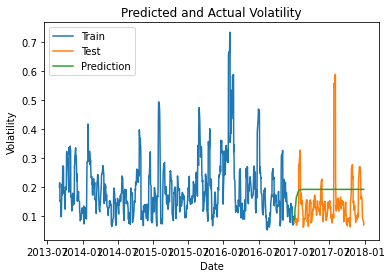

In [16]:
# Model Building
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

AAforecast = model.predict(n_periods=len(test))
AAforecast = pd.DataFrame(AAforecast, index = test.index, columns=['Prediction'])

plt.plot(train, label = 'Train')
plt.plot(test, label = 'Test')
plt.plot(AAforecast, label='Prediction')
plt.title('Predicted and Actual Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend(loc = 'upper left')
plt.show()

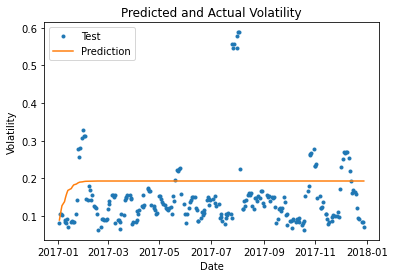

In [17]:
plt.plot(test, label='Test', linestyle = 'None', marker = '.')
plt.plot(AAforecast, label = 'Prediction')
plt.title('Predicted and Actual Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend(loc = 'upper left')
plt.show()

Prediction line is over a majority of the test plots. This is not a good model. 

In [18]:
train1 = BA1['2013': '2016']
test1 = BA1['2017']

Text(0.5, 1.0, 'Auto Arima Model')

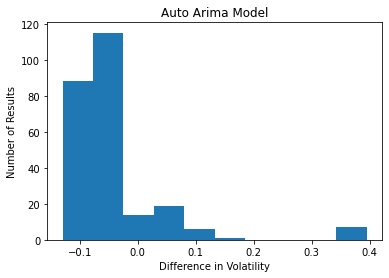

In [19]:
abc = test['Hv10']- AAforecast['Prediction']
plt.hist(abc)
plt.xlabel('Difference in Volatility')
plt.ylabel('Number of Results')
plt.title('Auto Arima Model')

This over-predicts volatility in the vast majority of instances.

In [20]:
from math import sqrt
from sklearn.metrics import mean_squared_error

In [22]:
rmse =sqrt(mean_squared_error(test, AAforecast))
print('RMSE = \n', (rmse))
print('R squared = \n', (r2_score(test, AAforecast)))
print('Upper and Lower Bounds for 90% Density: \n', np.percentile(abc, [5, 95]))

RMSE = 
 0.0972522366003523
R squared = 
 -0.22123054567149603
Upper and Lower Bounds for 90% Density: 
 [-0.11127107  0.0875445 ]


This has a significant mean squared error and a negative R-squared. This indicates the model performed poorly.

In [23]:
print(test.mean())
print(train.mean())

Hv10    0.148016
dtype: float64
Hv10    0.193895
dtype: float64


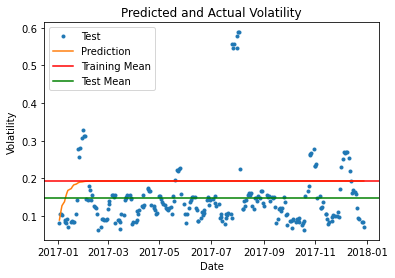

In [24]:
plt.plot(test['Hv10'], label='Test', linestyle = 'None', marker = '.')
plt.plot(AAforecast, label = 'Prediction')
plt.axhline(0.194, color = 'red', label = 'Training Mean')
plt.axhline(0.148, color = 'green', label = 'Test Mean')
plt.title('Predicted and Actual Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend(loc = 'upper left')
plt.show()

In [25]:
#Importing Facebook package
from fbprophet import Prophet

Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

In [26]:
daily_train = train.resample('B').sum()

daily_train['ds'] = daily_train.index
daily_train['y'] = daily_train.Hv10
daily_train = daily_train.drop(['Hv10'], axis = 1)

In [27]:
daily_train = daily_train.reset_index()
daily_train = daily_train.drop(['Date'], axis = 1)

In [28]:
Pmodel = Prophet()

In [29]:
Pmodel.fit(daily_train);

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [30]:
future_data = Pmodel.make_future_dataframe(periods = len(test), freq = 'b')

In [31]:
forecast_data = Pmodel.predict(future_data)

In [32]:
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1114,2017-12-11,0.059928,-0.051091,0.175662
1115,2017-12-12,0.077161,-0.036323,0.191703
1116,2017-12-13,0.084464,-0.026625,0.193785
1117,2017-12-14,0.079577,-0.037402,0.198552
1118,2017-12-15,0.066799,-0.046574,0.179025


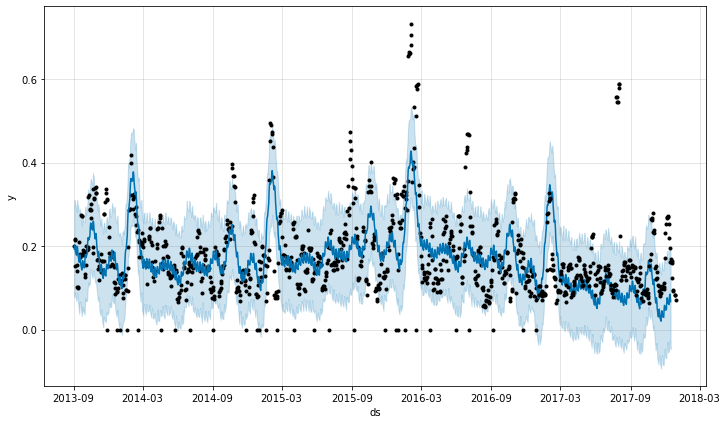

In [33]:
Pmodel.plot(forecast_data)
plt.plot(test, marker = '.', linestyle = 'None', color = 'black')
plt.show()

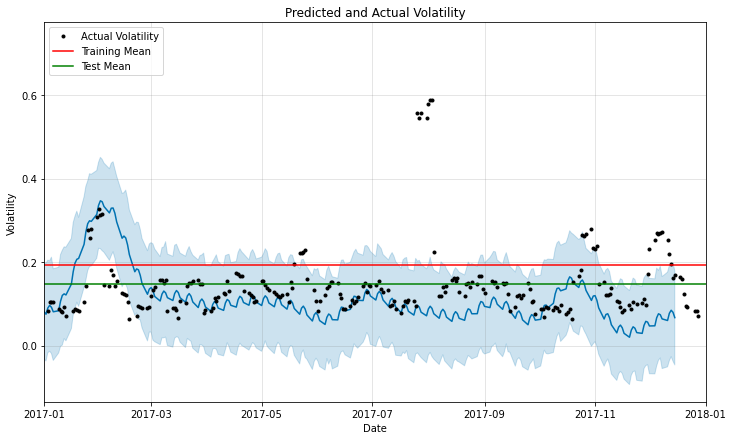

In [34]:
Pmodel.plot(forecast_data)
plt.plot(test, marker = '.', linestyle  = 'None', color = 'black', label = 'Actual Volatility')
plt.xlim([datetime(2017, 1, 1), datetime(2018, 1, 1)])
plt.axhline(0.194, color = 'red', label = 'Training Mean')
plt.axhline(0.148, color = 'green', label = 'Test Mean')
plt.title('Predicted and Actual Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend(loc = 'upper left')
plt.show()

This model appears better in terms of fit and movement in volatility. We need to see the rmse and the r squared. 

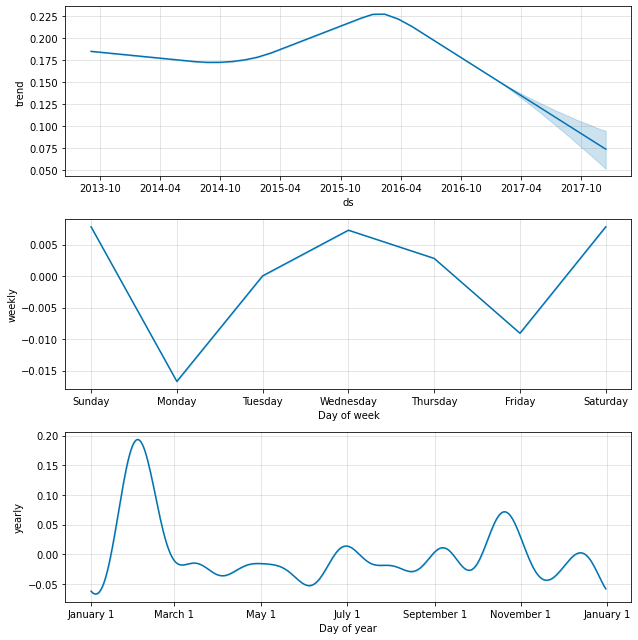

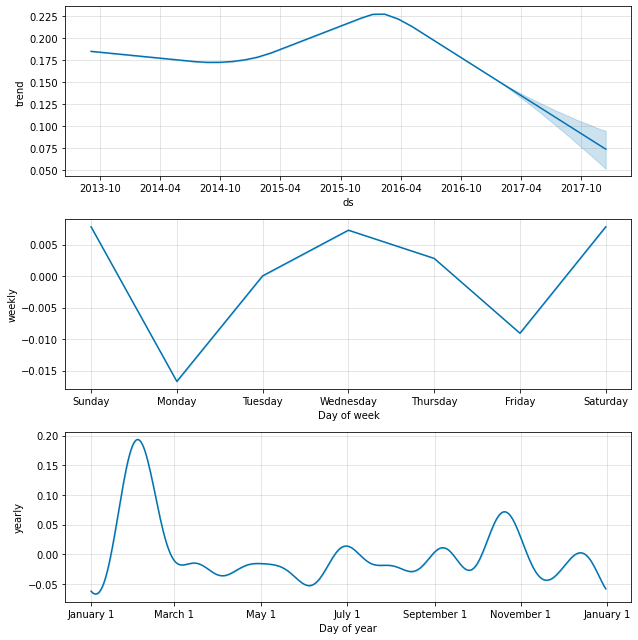

In [35]:
Pmodel.plot_components(forecast_data)

In [42]:
forecast_data_2017 = pd.read_csv('forecast_data_2017.csv')

In [50]:
forecast_data_2017.set_index('ds', inplace = True)

In [48]:
forecast_data_2017.drop(columns = 'Unnamed: 0', inplace = True)

In [51]:
forecast_data_2017

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,,,,
1/2/17,0.156195,-0.037157,0.197044,0.156195,0.156195,-0.081201,-0.081201,-0.081201,-0.016700,-0.016700,-0.016700,-0.064501,-0.064501,-0.064501,0,0,0,0.074994
1/3/17,0.155958,-0.017246,0.204495,0.155958,0.155958,-0.066124,-0.066124,-0.066124,0.000034,0.000034,0.000034,-0.066158,-0.066158,-0.066158,0,0,0,0.089835
1/4/17,0.155722,-0.013773,0.202763,0.155722,0.155722,-0.059634,-0.059634,-0.059634,0.007280,0.007280,0.007280,-0.066914,-0.066914,-0.066914,0,0,0,0.096087
1/5/17,0.155485,-0.019124,0.211765,0.155485,0.155485,-0.063873,-0.063873,-0.063873,0.002808,0.002808,0.002808,-0.066682,-0.066682,-0.066682,0,0,0,0.091612
1/6/17,0.155249,-0.035697,0.183855,0.155249,0.155249,-0.074444,-0.074444,-0.074444,-0.009061,-0.009061,-0.009061,-0.065383,-0.065383,-0.065383,0,0,0,0.080805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12/11/17,0.075072,-0.051091,0.175662,0.053147,0.095380,-0.015144,-0.015144,-0.015144,-0.016700,-0.016700,-0.016700,0.001556,0.001556,0.001556,0,0,0,0.059928
12/12/17,0.074835,-0.036323,0.191703,0.052854,0.095232,0.002326,0.002326,0.002326,0.000034,0.000034,0.000034,0.002292,0.002292,0.002292,0,0,0,0.077161
12/13/17,0.074599,-0.026625,0.193785,0.052543,0.095073,0.009865,0.009865,0.009865,0.007280,0.007280,0.007280,0.002585,0.002585,0.002585,0,0,0,0.084464


In [52]:
diff = test['Hv10'] - forecast_data_2017['yhat']
test.head()

,Hv10
Date,
2017-01-03,0.0821
2017-01-04,0.1052
2017-01-05,0.1049
2017-01-06,0.1031
2017-01-09,0.0885


Text(0.5, 1.0, 'Prophet Model')

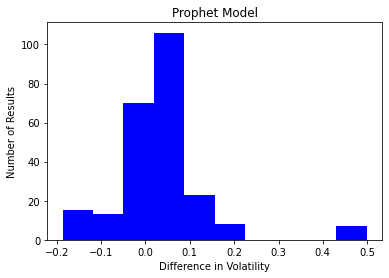

In [57]:
diff =  test['Hv10']- forecast_data_2017['yhat']
diff = diff.dropna()
plt.hist(diff, color = 'blue')
plt.xlabel("Difference in Volatility")
plt.ylabel("Number of Results")
plt.title('Prophet Model')

In [ ]:
rmse= sqrt(mean_squared_error(test,forecast_data_2017))
print('RMSE = \n', (rmse))
print('R squared = \n', (r2_score(test,forecast_data_2017)))
print('Upper and Lower Bounds for 90% Density:  \n', np.percentile(diff, [5,95]))

This overall is a better model than the baseline auto-arima. However, R-squared is still negative indicating the model is worse than just using the mean of the data.

In [60]:
FBtrain = BA1['2013': '2016'].resample('B').sum()
FBtrain['ds'] = FBtrain.index
FBtrain['y'] = FBtrain.Hv10
FBtrain = FBtrain.drop(['Hv10'], axis = 1)
FBtrain = FBtrain.reset_index()
FBtrain = FBtrain.drop(['Date'], axis = 1)

FBtrain.head()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,...,IvCall720,IvPut720,IvMean720,IvMeanSkew720,IvCall1080,IvPut1080,IvMean1080,IvMeanSkew1080,ds,y
0,105.13,105.8300,104.6600,105.01,3659800.0,0.0,1.0,89.468137,90.063854,89.068156,...,0.2498,0.2566,0.2532,0.0262,0.2498,0.2566,0.2532,0.0262,2013-09-03,0.2010
1,105.05,107.1200,104.6200,106.37,3837500.0,0.0,1.0,89.400055,91.161674,89.034115,...,0.2500,0.2567,0.2533,0.0260,0.2500,0.2567,0.2533,0.0260,2013-09-04,0.2156
2,106.16,106.9770,105.6702,106.65,2590500.0,0.0,1.0,90.344691,91.039978,89.927860,...,0.2491,0.2557,0.2524,0.0267,0.2491,0.2557,0.2524,0.0267,2013-09-05,0.2157
3,107.00,107.3799,105.1100,106.07,3265200.0,0.0,1.0,91.059551,91.382855,89.451116,...,0.2585,0.2486,0.2535,0.0302,0.2585,0.2486,0.2535,0.0302,2013-09-06,0.1523
4,106.58,107.3800,106.5550,107.19,2907600.0,0.0,1.0,90.702121,91.382941,90.680846,...,0.2575,0.2474,0.2525,0.0302,0.2575,0.2474,0.2525,0.0302,2013-09-09,0.1549


This model can use additional features using the add_regressor function. 

In [61]:
FBtrain.index

RangeIndex(start=0, stop=869, step=1)

In [62]:
m = Prophet()
m.add_regressor('IvMean10')
m.fit(FBtrain)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [63]:
FBtest = BA1['2017'].resample('B').sum()
FBtest['ds'] = FBtest.index
FBtest['y'] = FBtest.Hv10
FBtest = FBtest.drop(['Hv10'], axis = 1)
FBtest = FBtest.reset_index()
FBtest = FBtest.drop(['Date'], axis = 1)

FBtest.head()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,...,IvCall720,IvPut720,IvMean720,IvMeanSkew720,IvCall1080,IvPut1080,IvMean1080,IvMeanSkew1080,ds,y
0,156.30,157.1400,155.210,156.97,3426113.0,0.0,1.0,144.842634,145.621059,143.832535,...,0.2423,0.2597,0.2510,0.0190,0.2430,0.2607,0.2518,0.0184,2017-01-03,0.0821
1,157.81,159.2299,157.810,158.62,3189810.0,0.0,1.0,146.241945,147.557761,146.241945,...,0.2424,0.2572,0.2498,0.0206,0.2431,0.2581,0.2506,0.0202,2017-01-04,0.1052
2,158.41,159.7000,157.401,158.71,2794384.0,0.0,1.0,146.797963,147.993401,145.862926,...,0.2386,0.2558,0.2472,0.0213,0.2392,0.2567,0.2480,0.0209,2017-01-05,0.1049
3,158.98,159.6600,157.890,159.10,2426662.0,0.0,1.0,147.326180,147.956333,146.316081,...,0.2392,0.2539,0.2466,0.0210,0.2399,0.2546,0.2472,0.0206,2017-01-06,0.1031
4,159.00,159.2400,158.170,158.32,2838600.0,0.0,1.0,147.344714,147.567121,146.575556,...,0.2387,0.2480,0.2434,0.0262,0.2392,0.2484,0.2438,0.0260,2017-01-09,0.0885


In [64]:
new_fut = pd.DataFrame(pd.date_range(start = '2017-1-1', end = '2018-1-1', freq = 'b'), columns = ['ds'])

In [65]:
new_fut['IvMean10'] = FBtest['IvMean10']

In [66]:
new_fut = new_fut.dropna()

In [67]:
data = m.predict(new_fut)

In [68]:
test.tail()

,Hv10
Date,
2017-12-21,0.0953
2017-12-22,0.0914
2017-12-26,0.0833
2017-12-27,0.0833
2017-12-28,0.0710


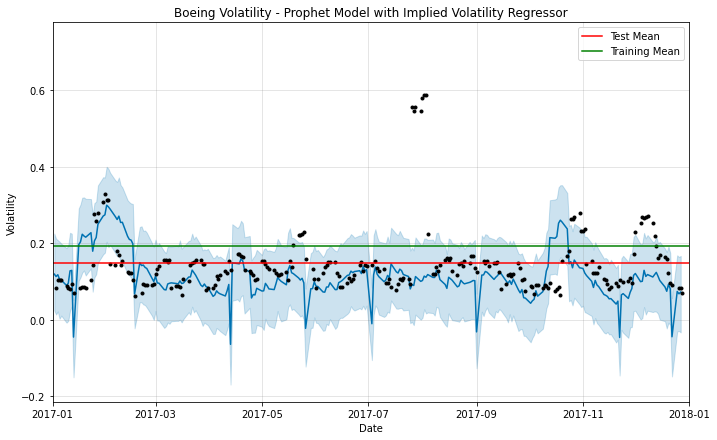

In [69]:
m.plot(data)
plt.plot(test['Hv10'], marker = '.', linestyle = 'None', color = 'black')
plt.axhline(0.148016, color = 'red', label = 'Test Mean')
plt.xlim([datetime(2017, 1, 1), datetime(2018, 1, 1)])
plt.title('Boeing Volatility - Prophet Model with Implied Volatility Regressor')
plt.axhline(0.193895, color = 'green', label = 'Training Mean')
plt.ylabel('Volatility')
plt.xlabel('Date')
plt.legend(loc = 'upper right')
plt.show()

With the added regressor, this appears to be similar to the previous one. 

In [70]:
testds = test
testds['ds'] = testds.index

In [71]:
testds = testds.reset_index()
testds = testds.drop(['Date'], axis = 1)

In [72]:
merged = pd.merge(testds, data, how = 'inner', on = 'ds')

In [73]:
print(len(testds))
print(len(merged))

250
249


In [74]:
merged.head()

,Hv10,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,IvMean10,IvMean10_lower,IvMean10_upper,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,0.0821,2017-01-03,0.161794,0.013943,0.212253,0.161794,0.161794,-0.006641,-0.006641,-0.006641,...,-0.010810,-0.010810,-0.010810,-0.030974,-0.030974,-0.030974,0.0,0.0,0.0,0.113370
1,0.1052,2017-01-04,0.161663,0.022009,0.208392,0.161663,0.161663,-0.013518,-0.013518,-0.013518,...,0.004382,0.004382,0.004382,-0.034605,-0.034605,-0.034605,0.0,0.0,0.0,0.117923
2,0.1049,2017-01-05,0.161532,0.002870,0.204219,0.161532,0.161532,-0.020982,-0.020982,-0.020982,...,0.003495,0.003495,0.003495,-0.037908,-0.037908,-0.037908,0.0,0.0,0.0,0.106137
3,0.1031,2017-01-06,0.161401,0.010984,0.199144,0.161401,0.161401,-0.013853,-0.013853,-0.013853,...,-0.003046,-0.003046,-0.003046,-0.040773,-0.040773,-0.040773,0.0,0.0,0.0,0.103729
4,0.0885,2017-01-09,0.161007,-0.007451,0.187342,0.161007,0.161007,-0.012512,-0.012512,-0.012512,...,-0.013022,-0.013022,-0.013022,-0.045641,-0.045641,-0.045641,0.0,0.0,0.0,0.089832


In [75]:
rmse = sqrt(mean_squared_error(merged['Hv10'],merged['yhat']))
print('RMSE = \n', (rmse))
print('R sqaured = \n', (r2_score(merged['Hv10'],merged['yhat'])))
print('Upper and Lower Bounds for 90% Density: \n', np.percentile((merged['Hv10']-merged['yhat']), [5,95]))

RMSE = 
 0.10252097046226422
R sqaured = 
 -0.3558794379551391
Upper and Lower Bounds for 90% Density: 
 [-0.10812479  0.1539203 ]


This appears to be the best model so far, but still has a negative r squared. 

Text(0.5, 1.0, 'Prophet Model')

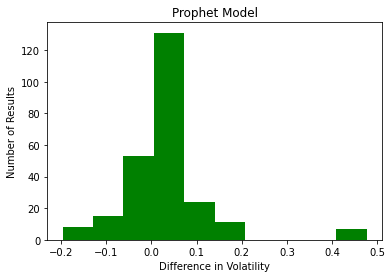

In [76]:
pdiff = merged['Hv10'] - merged['yhat']
plt.hist(pdiff, color = 'green')
plt.xlabel('Difference in Volatility')
plt.ylabel('Number of Results')
plt.title('Prophet Model')

In [77]:
BA2.iloc[840:842]

,Hv10
Date,
2017-01-03,0.0821
2017-01-04,0.1052


It is time to predict one day at a time rather than the entire year to see if accuracy will be improved.

In [78]:
# New Model that predicts one day at time
a = 840
forecasts = []

while a< 1088:
    model = auto_arima(train, trace = True, error_action='ignore', supress_warnings=True)
    model.fit(BA2.iloc[:a])
    forecast = model.predict(n_periods=1)
    forecasts.extend(forecast)
    a += 1
    
forecast2 = pd.DataFrame(forecasts, columns = ['Prediction'])
forecast2.head()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.15 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.23 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.48 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.70 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.52 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.98 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.88 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=2.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.58 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.48 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=1.07 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.87 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.43 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 14.520 seconds


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.60 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.25 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.40 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.54 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.13 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.51 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.91 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.87 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.82 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.44 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.02 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.93 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.78 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 13.433 seconds


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.31 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.31 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.32 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.63 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.32 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.87 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.80 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.54 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.68 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.57 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.88 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.39 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.26 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 12.993 seconds


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.18 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.38 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.53 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.22 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.71 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.63 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.16 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.47 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=0.97 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.70 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.26 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.20 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.756 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=0.99 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.27 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.09 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.71 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.63 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.17 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.45 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.10 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.83 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.29 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.319 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.08 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.33 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.50 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.23 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.63 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.64 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.24 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.37 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.02 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.80 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.96 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.22 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.307 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.24 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.10 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.69 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.64 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.23 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.40 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.24 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.80 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.96 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.26 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.342 seconds


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.07 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.21 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.11 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.68 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.63 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.23 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.39 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.03 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.76 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.90 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.26 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.005 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.28 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.16 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.25 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.13 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.66 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.63 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.22 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.39 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=0.98 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.77 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.88 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.30 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.156 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.09 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.26 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.17 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.63 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.68 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.38 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.37 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=0.98 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.77 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.95 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.23 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.172 seconds


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.26 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.16 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.64 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.68 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.20 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.37 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.06 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.70 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.25 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.20 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.184 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.26 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.16 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.64 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.69 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.20 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.37 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.05 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.71 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.19 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.23 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.165 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.31 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.58 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.10 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.14 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.63 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.83 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.17 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.39 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.03 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.81 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.13 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.20 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.535 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.00 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.17 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.62 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.66 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.24 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.38 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.29 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.71 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.99 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.188 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.00 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.26 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.42 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.13 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.62 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.70 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.17 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.38 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.05 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.72 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.98 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 9.910 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.32 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.18 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.63 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.66 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.23 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.38 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.06 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.71 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.97 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.19 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.249 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.26 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.15 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.64 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.65 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.44 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.39 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.05 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.71 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.96 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.120 seconds


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.26 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.22 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.62 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.67 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.22 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.38 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.06 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.69 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.17 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.27 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.247 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.06 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.38 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.25 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.62 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.65 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.24 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.39 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.05 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.70 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.99 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.085 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.06 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.18 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.77 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.73 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.25 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.39 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.06 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.71 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.97 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.22 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.291 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.11 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.18 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.62 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.63 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.23 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.38 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=0.98 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.78 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.24 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.20 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.279 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.25 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.12 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.78 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.74 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.41 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.45 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.07 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.76 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.37 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.946 seconds


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.09 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.26 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.49 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.28 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.62 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.64 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.28 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.43 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.12 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.72 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.98 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.20 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.411 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.07 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.25 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.15 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.65 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.64 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.21 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.38 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.16 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.89 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.97 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.20 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.225 seconds


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.09 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.25 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.18 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.63 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.63 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.23 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.38 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=0.98 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.78 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.93 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.25 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 9.990 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.05 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.24 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.43 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.47 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.17 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.71 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.64 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.23 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.46 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.01 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.84 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.07 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.31 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.725 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.20 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.32 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.13 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.69 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.62 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.35 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.50 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=0.98 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.74 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.93 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.27 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.250 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.59 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.28 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.33 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.55 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.25 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.69 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.82 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.61 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.44 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.02 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.99 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.51 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.43 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 12.614 seconds


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.17 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.28 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.48 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.18 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.66 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.69 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.35 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.45 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.18 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.78 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.42 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.31 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 11.254 seconds


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.06 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.32 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.13 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.86 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.64 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.57 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.38 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=0.99 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.78 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.53 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.24 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 11.168 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.29 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.26 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.37 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.61 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.24 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.17 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.81 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.73 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.33 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.48 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=0.99 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.71 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.30 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 11.365 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.06 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.29 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.50 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.11 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.66 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.73 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.38 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.49 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.00 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.73 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.01 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.433 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.31 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.27 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.39 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.48 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.50 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.85 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=1.11 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.21 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.41 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.33 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.86 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.99 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 12.012 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.26 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.50 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.14 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.69 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.71 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.18 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.44 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.03 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.71 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.10 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.235 seconds


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.21 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.38 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.29 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.41 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.73 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.80 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.82 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.46 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.49 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.07 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.71 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.98 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.22 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 11.682 seconds


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.10 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.28 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.77 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.71 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.23 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.38 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.07 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.71 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.20 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.413 seconds


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.29 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.47 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.55 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.65 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.86 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.20 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.38 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.16 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.85 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.941 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.31 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.46 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.12 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.70 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.67 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.18 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.48 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.00 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.71 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.00 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.128 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.25 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.24 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.26 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.52 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.53 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.89 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.71 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.27 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.39 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.21 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.99 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.12 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 11.694 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.25 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.29 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.41 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.12 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.74 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.75 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.38 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.39 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.01 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.81 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.95 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.31 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.507 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.35 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.43 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.14 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.72 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.64 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.19 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.48 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.00 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.73 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.29 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.22 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.478 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.26 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.30 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.12 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.73 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.65 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.25 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.43 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=0.99 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.74 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.96 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.22 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.155 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.28 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.48 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.31 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.69 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.80 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.18 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.47 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.25 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.72 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.744 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.20 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.26 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.41 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.10 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.13 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.64 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.74 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.18 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.39 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.10 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.91 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.09 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.20 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.390 seconds


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.51 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.14 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.64 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.75 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.18 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.40 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.04 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.71 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.158 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.27 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.34 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.13 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.73 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.65 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.26 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.44 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=0.98 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.73 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.98 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.436 seconds


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.10 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.26 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.41 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.19 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.66 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.77 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.40 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.39 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.02 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.76 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.22 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.470 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.25 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.26 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.13 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.71 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.65 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.25 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.40 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=0.99 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.80 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.27 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.27 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.512 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.10 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.41 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.20 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.63 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.66 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.26 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.41 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=0.99 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.77 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.07 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.241 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.11 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.16 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.49 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.33 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.65 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.68 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.25 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.40 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.09 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.71 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.01 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.465 seconds


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.09 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.21 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.66 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.67 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.26 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.43 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.29 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.73 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.20 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.481 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.07 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.26 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.41 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.21 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.64 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.66 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.26 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.39 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.10 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.72 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.01 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.218 seconds


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.08 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.26 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.41 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.16 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.64 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.69 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.21 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.39 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.08 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.72 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.01 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.139 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.32 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.25 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.22 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.64 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.86 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.31 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.39 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.07 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.71 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.20 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.789 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.09 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.28 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.49 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.13 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.68 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.72 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.18 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.44 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.05 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.71 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.27 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.524 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.09 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.20 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.28 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.41 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.16 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.67 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.64 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.27 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.38 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.00 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.80 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.99 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.29 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.275 seconds


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.28 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.34 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.45 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.19 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.64 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.65 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.25 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.39 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.01 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.77 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.01 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.491 seconds


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.11 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.25 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.41 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.20 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.64 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.65 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.56 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.45 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.10 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.71 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.01 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.20 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.574 seconds


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.05 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.41 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.18 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.65 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.69 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.25 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.40 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.09 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.72 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.20 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.29 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.454 seconds


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.40 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.23 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.44 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.44 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.11 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.74 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.79 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.22 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.46 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.00 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.78 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.94 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.28 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.938 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.30 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.45 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.39 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.71 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.66 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.24 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.43 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.03 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.74 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.97 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.23 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.446 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.26 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.50 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.12 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.64 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.74 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.16 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.42 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.09 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.88 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.22 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.376 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.32 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.46 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.13 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.69 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.68 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.18 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.50 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.01 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.81 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.01 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.22 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.291 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.30 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.27 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.29 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.41 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.13 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.82 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.72 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.51 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.94 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.32 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.72 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.37 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.38 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 12.260 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.53 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.26 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.59 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.43 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.65 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.72 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.32 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.40 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.07 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.73 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.99 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.22 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 11.198 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.00 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.29 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.45 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.10 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.10 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.63 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.74 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.23 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.48 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.06 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.71 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.97 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.179 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.00 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.26 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.48 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.10 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.63 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.72 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.16 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.38 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.06 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.71 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.27 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.057 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=0.99 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.25 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.50 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.09 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.63 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.73 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.18 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.39 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.02 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.71 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.98 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.20 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 9.936 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.00 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.48 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.12 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.81 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.73 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.16 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.46 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=0.99 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.70 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.98 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.196 seconds


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.49 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.10 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.72 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.71 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.16 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.42 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.01 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.78 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.17 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.22 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.317 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.06 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.21 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.41 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.11 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.80 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.68 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.24 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.39 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=0.99 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.78 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.90 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.32 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.229 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.36 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.23 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.26 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.19 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.63 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.63 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.25 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.38 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.00 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.80 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.23 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.474 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.10 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.42 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.20 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.64 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.66 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.46 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.39 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.07 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.71 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.99 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.20 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.384 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.07 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.20 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.62 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.63 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.38 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.45 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.07 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.73 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.32 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.608 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.00 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.28 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.16 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.64 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.72 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.22 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.38 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.07 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.71 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.98 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.049 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.07 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.48 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.64 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.70 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.22 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.39 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.07 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.70 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.20 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.422 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.10 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.18 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.65 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.64 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.25 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.38 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=0.97 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.95 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.310 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.10 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.20 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.64 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.64 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.24 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.38 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.02 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.73 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.98 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.20 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.041 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.28 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.24 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.28 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.18 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.63 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.64 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.27 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.39 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.07 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.71 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.99 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.378 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.09 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.25 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.19 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.63 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.63 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.40 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.41 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.07 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.71 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.20 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.282 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.13 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.64 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.73 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.17 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.38 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.07 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.72 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.28 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.28 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.376 seconds


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.06 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.25 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.32 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.10 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.71 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.63 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.19 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.47 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=0.97 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.72 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.95 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.085 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.25 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.29 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.42 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.33 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.65 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.66 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.22 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.39 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=0.99 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.78 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.92 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.29 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.307 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.09 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.26 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.15 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.65 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.63 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.23 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.39 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.21 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.80 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.01 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.24 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.301 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.08 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.26 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.22 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.64 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.64 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.27 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.39 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.05 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.72 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.99 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.180 seconds


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.05 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.17 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.63 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.73 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.47 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.47 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.11 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.71 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.08 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.579 seconds


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.51 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.18 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.88 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.70 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.18 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.47 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.00 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.70 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.09 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.461 seconds


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.00 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.36 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.11 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.72 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.64 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.18 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.49 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.06 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=1.00 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=3.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 11.474 seconds


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.19 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.28 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.75 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.82 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=1.08 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.27 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.41 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.11 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.73 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.39 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.27 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 11.962 seconds


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.05 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.21 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.35 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.10 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.71 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.64 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.16 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.47 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=0.98 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.70 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.60 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.30 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.754 seconds


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.36 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.52 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.20 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.64 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.69 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.32 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.38 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.07 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.70 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.98 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.20 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.516 seconds


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.20 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.64 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.62 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.34 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.47 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.08 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.72 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.97 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.333 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.42 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.14 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.64 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.73 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.17 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.39 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.07 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.70 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.00 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.29 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.096 seconds


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.26 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.44 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.10 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.10 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.64 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.71 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.17 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.38 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.07 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.70 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.98 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.23 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.020 seconds


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=0.99 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.36 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.42 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.33 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.73 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.63 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.19 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.45 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=0.97 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.72 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.95 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.235 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.26 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.41 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.39 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.66 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.63 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.34 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.38 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.21 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.83 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.01 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.674 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.25 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.30 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.12 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.72 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.63 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.19 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.46 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.06 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.72 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.99 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.154 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.14 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.24 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.35 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.50 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.10 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.66 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.71 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.17 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.41 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.02 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.74 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.352 seconds


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.00 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.28 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.49 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.09 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.64 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.72 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.30 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.53 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.03 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.72 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.78 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.31 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 11.161 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.47 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.25 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.34 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.51 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.66 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.83 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.94 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.49 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.44 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.08 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.89 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.28 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.26 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 12.543 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.10 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.14 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.64 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.72 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.17 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.38 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.07 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.71 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.067 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.10 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.30 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.53 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.41 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.67 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.68 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.26 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.38 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.07 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.71 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.00 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.596 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.10 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.29 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.19 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.63 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.64 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.25 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.41 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.28 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.79 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.99 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.22 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.553 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.17 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.14 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.66 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.64 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.27 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.38 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=0.98 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.83 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.99 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.27 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.255 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.34 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.20 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.11 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.83 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.82 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.63 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.41 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=0.99 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.76 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.97 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 11.014 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.36 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.29 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.44 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.23 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.82 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=1.12 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.26 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.39 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.06 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.70 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.99 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.23 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 11.195 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.08 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.28 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.19 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.63 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.64 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.26 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.38 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.08 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.71 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.27 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.400 seconds


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.26 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.18 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.63 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.69 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.21 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.40 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.08 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.73 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.23 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.118 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.08 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.30 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.50 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.26 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.63 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.63 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.26 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.38 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.08 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.71 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.98 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.311 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.09 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.26 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.18 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.64 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.63 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.25 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.39 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.17 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.84 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.99 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.22 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.319 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.09 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.26 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.09 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.68 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.65 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.26 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.38 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=0.98 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.83 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.90 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.26 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.032 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.15 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.28 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.42 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.44 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.11 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.73 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.64 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.18 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.49 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=0.98 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.70 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.98 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.387 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.00 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.28 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.10 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.71 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.64 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.43 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.41 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=0.99 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.78 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.89 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.27 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.261 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.36 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.22 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.91 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.71 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.25 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.41 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=0.99 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.72 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.13 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.35 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.729 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.33 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.11 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.73 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.64 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.17 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.49 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=0.99 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.70 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.26 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.127 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.00 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.26 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.52 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.14 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.83 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.74 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.17 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.46 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=0.99 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.71 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.99 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.273 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.16 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.26 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.41 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.10 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.33 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.99 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.89 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.23 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.53 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.00 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.88 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.01 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.20 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 11.038 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.45 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.14 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.71 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.76 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.17 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.38 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.05 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.71 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.06 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.23 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.254 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.31 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.50 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.23 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.63 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.85 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.24 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.38 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.07 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.70 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.11 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.22 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.555 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.09 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.47 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.18 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.65 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.64 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.29 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.41 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.28 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.82 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.10 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.22 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.672 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.10 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.28 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.29 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.63 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.66 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.28 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.38 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.08 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.71 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.99 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.267 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.28 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.26 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.18 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.71 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.64 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.40 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.42 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.02 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.77 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.99 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.23 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.572 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.14 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.19 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.64 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.65 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.47 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.38 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.01 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.78 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.20 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.425 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.05 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.30 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.26 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.12 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.72 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.64 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.24 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.41 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.00 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.74 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.09 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.38 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.425 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.09 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.26 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.16 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.64 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.64 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.24 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.38 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=0.99 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.80 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.93 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.30 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.101 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.36 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.42 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.12 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.86 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.75 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.26 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.45 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.51 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.78 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.20 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 11.023 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.00 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.26 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.29 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.41 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.10 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.72 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.63 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.21 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.45 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=0.98 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.99 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.34 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.31 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.783 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.56 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.20 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.31 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.46 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.37 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.70 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.69 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.37 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.41 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.28 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.76 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.17 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.22 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 11.620 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.33 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.20 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.29 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.43 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.27 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.68 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.84 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.24 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.44 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.16 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.74 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.16 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.22 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 11.121 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.08 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.20 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.29 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.44 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.13 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.22 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.79 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.96 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.36 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.58 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.28 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=1.00 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.57 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.28 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 12.197 seconds


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.26 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.48 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.10 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.63 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.73 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.17 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.47 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.20 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.71 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.00 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.20 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.253 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.18 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.63 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.65 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.25 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.38 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.14 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.71 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.14 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.260 seconds


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.48 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.10 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.64 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.74 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.17 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.38 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.07 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.71 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.118 seconds


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.49 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.10 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.70 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.88 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.18 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.39 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.03 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.70 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.99 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.231 seconds


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.07 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.20 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.26 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.11 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.71 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.64 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.26 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.38 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=0.99 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.93 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.30 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.375 seconds


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.10 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.26 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.41 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.20 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.63 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.64 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.25 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.39 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=0.99 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.96 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.12 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.20 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.419 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.18 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.28 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.32 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.43 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.14 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.66 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.64 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.30 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.38 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.02 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=1.02 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.38 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.23 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 11.075 seconds


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.16 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.26 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.20 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.65 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.77 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.42 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.39 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.08 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.81 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.98 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.600 seconds


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.32 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.48 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.10 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.14 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.63 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.73 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.17 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.38 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.08 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.71 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.32 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.20 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.531 seconds


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.26 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.31 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.10 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.76 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.63 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.21 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.45 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=0.98 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.73 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.96 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.20 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.086 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.28 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.23 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.30 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.53 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.23 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.63 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.63 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.27 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.38 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.04 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.72 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.99 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.20 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.544 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.05 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.26 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.19 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.64 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.66 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.42 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.39 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.06 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.71 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.25 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.322 seconds


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.35 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.27 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.38 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.44 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.10 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.72 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.64 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.18 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.48 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=0.99 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.71 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.28 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.29 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.924 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.06 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.24 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.13 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.67 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.63 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.24 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.40 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.00 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.76 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.91 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.27 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.062 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.08 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.24 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.34 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.50 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.19 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.63 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.64 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.24 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.39 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=0.98 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.78 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.99 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.302 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.09 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.21 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.14 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.66 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.64 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.23 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.41 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.20 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.77 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.19 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.25 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.531 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.08 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.41 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.19 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.65 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.64 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.23 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.39 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=0.99 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.78 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.99 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.081 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.21 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.26 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.41 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.18 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.66 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.69 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.35 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.39 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.01 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.78 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.00 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.22 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.431 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.07 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.28 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.14 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.68 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.67 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.42 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.39 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=0.98 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.81 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.11 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.23 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.480 seconds


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.10 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.28 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.18 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.63 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.65 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.24 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.38 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.00 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.77 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.34 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.20 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.432 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.19 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.65 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.64 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.25 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.39 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.06 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.71 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.99 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.22 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.082 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.26 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.51 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.11 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.27 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.64 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.72 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.16 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.38 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.07 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.71 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.99 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.20 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.236 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.00 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.20 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.51 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.10 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.64 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.75 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.18 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.41 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.54 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.95 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.13 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.989 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=0.99 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.34 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.44 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.11 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.72 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.66 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.18 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.50 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=0.99 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.78 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.16 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.27 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.423 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.35 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.10 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.72 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.64 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.16 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.48 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=0.99 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.72 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.99 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.026 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.05 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.26 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.27 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.78 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.64 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.27 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.38 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=0.99 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.79 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.92 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.30 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.419 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.09 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.28 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.56 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.67 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.64 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.27 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.39 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.31 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.72 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.98 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.788 seconds


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.00 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.41 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.10 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.18 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.64 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.73 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.17 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.40 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.15 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.74 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.18 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.20 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.347 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.26 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.49 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.12 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.63 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.74 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.18 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.39 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.07 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.70 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.00 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.20 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.069 seconds


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.36 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.41 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.11 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.85 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.73 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.19 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.47 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=0.99 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.71 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.96 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.255 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.20 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.28 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.09 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.69 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.63 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.25 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.40 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=0.99 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.91 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.09 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.27 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.406 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.35 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.11 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.73 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.64 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.16 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.49 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=0.99 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.71 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.01 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.065 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.00 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.26 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.48 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.13 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.31 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.64 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.81 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.20 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.40 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.02 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.72 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.20 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.393 seconds


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.28 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.49 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.11 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.65 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.74 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.26 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.61 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.18 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.71 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.99 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.20 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.502 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.09 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.10 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.68 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.64 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.25 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.38 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=0.98 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.78 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.92 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.31 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.068 seconds


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.10 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.26 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.17 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.66 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.65 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.24 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.39 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=0.98 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.80 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.92 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.31 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.152 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.09 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.26 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.31 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.74 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.64 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.26 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.42 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.41 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.71 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.01 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.20 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.743 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.06 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.18 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.64 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.63 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.27 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.38 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.33 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.92 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.07 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.611 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.00 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.44 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.10 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.12 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.64 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.74 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.16 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.40 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.07 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.71 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.101 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.38 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.29 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.28 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.42 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.10 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.13 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.64 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.72 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.17 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.39 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.09 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.71 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.99 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.539 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.28 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.49 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.10 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.65 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.88 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.28 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.46 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=0.99 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.72 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.99 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.323 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.00 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.27 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.26 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.11 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.71 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.65 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.21 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.44 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=0.98 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.73 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.49 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.24 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.606 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.10 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.19 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.64 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.64 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.24 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.39 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=0.99 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.82 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.98 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.143 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.24 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.20 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.28 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.48 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.11 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.64 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.74 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.18 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.38 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.06 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.71 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.00 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.322 seconds


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.55 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.11 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.65 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.80 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.34 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.52 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=0.99 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.72 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.99 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.20 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.396 seconds


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.35 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.10 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.71 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.65 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.17 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.50 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.00 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.71 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.27 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.22 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.359 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.10 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.21 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.63 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.64 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.26 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.38 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=0.99 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.79 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.52 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.22 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.659 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.24 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.25 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.26 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.48 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.11 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.63 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.75 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.17 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.38 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.06 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.72 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.01 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.20 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.359 seconds


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.26 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.49 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.10 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.64 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.96 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=2.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.49 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.26 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=1.03 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.65 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.29 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 12.470 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.37 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.30 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.33 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.53 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.54 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.79 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.80 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.75 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.52 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.35 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.94 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 12.594 seconds


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.20 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.34 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.42 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.16 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.72 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.63 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.16 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.48 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=0.98 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.71 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.25 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.30 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.461 seconds


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.10 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.26 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.19 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.63 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.66 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.24 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.38 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=0.98 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.78 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.00 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.20 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.103 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.43 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.26 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.36 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.60 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.12 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.63 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.79 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.16 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.39 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.06 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.71 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.99 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.20 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.805 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.14 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.24 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.34 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.50 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.26 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.81 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.86 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.33 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.41 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.00 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.78 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.99 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.972 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.10 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.21 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.63 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.64 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.24 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.39 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.03 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.74 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.25 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.19 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.357 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.28 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.15 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.64 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.70 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.21 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.38 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.07 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.72 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.99 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.031 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.10 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.24 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.33 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.56 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.10 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.63 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.86 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.32 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.46 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.02 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.71 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.99 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.22 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.619 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.31 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.45 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.12 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.69 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.66 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.43 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.48 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.00 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.72 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.97 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.297 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.51 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.10 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.64 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.74 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.20 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.41 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.04 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.72 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.29 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.208 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.25 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.29 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.10 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.71 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.64 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.19 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.46 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=0.98 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.71 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.97 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.019 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.00 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.33 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.42 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.21 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.86 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.76 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.27 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.39 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=0.98 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.79 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.91 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.28 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.484 seconds


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.09 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.20 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.12 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.67 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.64 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.24 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.46 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.11 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.95 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.06 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.24 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.521 seconds


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.06 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.29 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.46 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.11 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.19 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.70 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.80 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.20 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.53 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.09 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.74 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.65 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.51 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 11.552 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.09 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.19 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.63 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.63 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.25 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.38 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.00 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.85 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.99 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.20 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.145 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.08 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.44 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.37 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.64 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.65 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.25 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.39 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.06 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.71 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.378 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.05 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.21 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.63 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.64 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.26 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.38 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.32 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.72 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.99 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.20 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.334 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.10 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.18 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.64 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.65 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.24 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.38 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.28 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.96 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.00 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.23 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.593 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.20 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.28 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.19 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.63 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.64 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.26 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.38 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.12 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.71 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.01 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.320 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.00 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.26 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.41 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.10 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.12 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.67 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.89 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.23 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.39 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.04 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.72 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.99 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.270 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.07 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.28 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.19 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.64 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.63 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.28 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.38 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.07 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.71 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.24 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.358 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.44 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.10 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.10 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.64 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.72 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.17 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.39 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.07 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.72 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.98 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.003 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.08 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.47 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.64 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.65 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.26 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.38 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.07 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.70 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.99 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.20 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.393 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.26 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.18 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.64 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.70 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.21 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.40 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.26 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.80 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.98 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.22 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.347 seconds


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.50 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.11 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.64 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.73 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.16 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.40 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.03 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.71 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.22 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.258 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.37 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.41 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.13 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.72 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.65 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.17 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.48 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.05 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.73 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.28 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.28 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.575 seconds


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.11 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.26 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.37 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.67 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.63 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.25 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.38 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.03 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.73 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.98 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.20 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.270 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.05 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.29 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.18 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.73 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.67 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.28 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.47 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.25 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.76 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.14 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.25 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.750 seconds


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.00 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.38 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.10 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.72 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.63 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.17 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.48 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=0.98 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.72 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.98 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.051 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.44 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.20 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.33 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.27 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.64 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.63 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.25 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.39 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=0.98 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.79 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.15 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.768 seconds


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.10 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.46 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.65 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.65 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.25 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.39 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.06 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.71 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.99 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.405 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.28 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.78 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=1.13 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.45 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.72 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.16 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.71 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.20 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 11.423 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.16 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.36 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.10 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.72 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.64 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.16 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.48 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.00 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.71 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.44 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.45 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.723 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.11 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.51 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.36 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.64 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.33 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.63 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.72 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.37 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.43 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.12 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.73 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.45 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 11.711 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.24 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.33 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.58 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.10 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.65 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.72 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.16 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.43 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.02 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.71 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.00 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.20 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.275 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.28 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.14 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.65 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.71 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.15 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.47 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.20 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.72 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.00 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.20 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.239 seconds


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.29 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.50 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.11 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.64 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.75 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.15 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.38 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.06 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.71 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.99 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.20 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.058 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.36 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.11 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.72 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.63 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.17 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.48 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.00 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.71 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.10 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.30 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.230 seconds


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.28 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.55 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.53 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.96 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.81 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.18 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.40 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.02 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.71 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 11.244 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.48 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.10 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.81 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.66 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.61 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.53 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=0.99 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.78 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.91 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.28 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.691 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.34 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.10 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.72 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.64 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.16 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.49 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=0.99 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.71 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.08 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.29 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.202 seconds


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.09 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.41 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.18 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.64 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.63 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.25 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.39 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=0.98 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.81 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.20 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.145 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.12 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.26 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.41 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.41 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.65 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.65 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.25 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.39 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.06 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.70 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.98 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.345 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.08 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.28 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.18 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.63 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.69 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.25 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.39 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.28 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.75 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.99 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.26 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.444 seconds


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.50 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.10 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.63 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.73 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.16 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.39 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.04 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.73 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.98 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.20 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.043 seconds


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.41 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.10 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.69 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.64 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.27 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.46 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.00 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.78 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.91 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.32 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.231 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.08 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.26 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.43 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.64 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.64 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.25 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.39 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.08 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.71 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.98 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.332 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.11 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.18 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.63 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.63 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.26 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.38 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.09 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.90 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.99 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.24 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.351 seconds


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.26 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.41 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.15 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.64 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.70 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.19 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.39 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.07 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.73 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.00 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.026 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.36 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.31 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.42 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.50 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.11 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.64 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.80 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.89 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.24 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.39 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.32 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.72 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.00 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.22 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 11.965 seconds


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.20 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.34 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.60 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.12 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.64 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.74 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.16 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.40 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.02 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.71 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.99 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.20 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.253 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.36 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.41 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.11 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.72 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.64 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.23 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.60 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.03 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.70 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.97 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.20 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.233 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.00 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.35 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.10 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.73 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.64 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.18 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.50 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=0.98 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.72 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.00 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.29 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.156 seconds


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.09 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.25 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.19 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.64 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.64 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.25 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.39 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=0.99 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.78 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.20 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.122 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.10 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.45 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.64 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.64 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.27 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.39 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.07 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.71 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.98 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.20 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.374 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.05 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.18 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.64 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.64 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.25 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.39 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.23 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.78 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.08 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.20 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.390 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.05 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.20 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.63 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.65 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.38 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.39 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.07 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.71 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.99 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.19 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.199 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.36 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.24 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.28 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.42 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.18 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.65 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.63 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.26 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.39 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.07 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.72 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.98 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.456 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.37 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.38 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.55 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.20 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.66 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.63 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.49 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.40 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.07 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.70 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.99 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.947 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.28 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.49 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.11 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.64 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.73 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.16 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.38 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.05 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.71 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.30 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.346 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.00 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.16 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.64 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.72 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.18 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.39 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.07 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.70 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.00 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.20 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 9.996 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.41 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.14 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.35 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.63 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.74 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.16 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.39 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.06 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.71 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.98 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.277 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.00 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.28 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.50 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.13 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.64 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.74 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.16 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.39 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.27 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.73 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.99 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.20 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.318 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.35 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.10 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.73 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.64 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.16 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.48 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=0.98 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.72 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.99 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.022 seconds


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.28 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.26 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.16 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.70 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.64 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.22 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.42 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=0.98 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.73 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.38 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.30 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.579 seconds


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.09 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.26 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.33 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.75 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.63 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.28 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.38 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.08 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.71 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.99 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.20 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.356 seconds


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.41 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.15 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.64 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.69 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.19 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.40 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.09 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.89 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.99 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.20 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.198 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.43 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.10 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.11 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.63 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.72 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.25 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.54 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.61 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=1.07 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=3.17 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.36 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 12.481 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.39 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.28 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.41 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.45 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.10 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.74 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.65 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.17 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.48 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=0.97 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.70 sec


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.98 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.20 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.609 seconds


,Prediction
0,0.089433
1,0.095848
2,0.118467
3,0.117237
4,0.114827


In [109]:
rmse = sqrt(mean_squared_error(test['Hv10'],forecast2['Prediction']))
print('RMSE = \n', (rmse))
print('R Squared = \n', (r2_score(test['Hv10'],forecast2['Prediction'])))

RMSE = 
 0.044082556064534
R Squared = 
 0.7497709277826197


This is a very good fit! The R=squared is .74!!!

In [118]:
# New Data Frame useable for plotting
newtest = testds
newtest['pred'] = forecast2['Prediction']
newtest.head()

,Hv10,ds,pred
0,0.0821,2017-01-03,0.089433
1,0.1052,2017-01-04,0.095848
2,0.1049,2017-01-05,0.118467
3,0.1031,2017-01-06,0.117237
4,0.0885,2017-01-09,0.114827


In [119]:
#Set Date as index
newtest = newtest.set_index('ds')
newtest.head()

,Hv10,pred
ds,,
2017-01-03,0.0821,0.089433
2017-01-04,0.1052,0.095848
2017-01-05,0.1049,0.118467
2017-01-06,0.1031,0.117237
2017-01-09,0.0885,0.114827


Text(0.5, 1.0, 'Auto Arima Model')

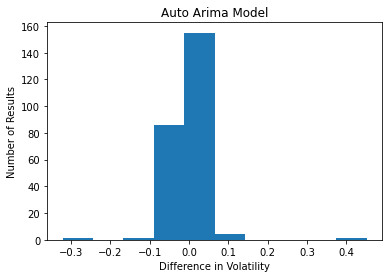

In [120]:
resid = newtest['Hv10']- newtest['pred']
plt.hist(resid)
plt.xlabel('Difference in Volatility')
plt.ylabel('Number of Results')
plt.title('Auto Arima Model')

Little to no difference between historical 10 day volatility and predictions. This means the volatility prediction has been very accurate.

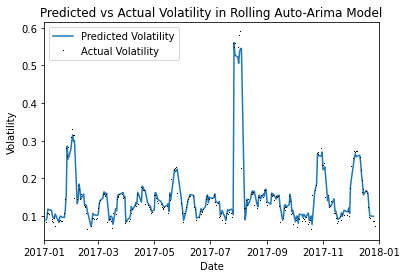

In [121]:
plt.plot(newtest['pred'], label = 'Predicted Volatility')
plt.plot(newtest['Hv10'], marker = ',', linestyle = 'None', color = 'black', label = 'Actual Volatility')
plt.xlim([datetime(2017, 1, 1), datetime(2018, 1, 1)])
plt.legend(loc = 'upper left')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title('Predicted vs Actual Volatility in Rolling Auto-Arima Model')
plt.show()

This is the rolling auto-arima model with very good accuracy. Since original prophet was more successful than baseline auto-arima, we are going to do the rolling method for the prophet as well. 

In [122]:
FBtrain = BA2

FBtrain['ds'] = FBtrain.index
FBtrain['y'] = FBtrain.Hv10
FBtrain = FBtrain.drop(['Hv10'], axis = 1)

In [123]:
FBtrain = FBtrain.reset_index()
FBtrain = FBtrain.drop(['Date'], axis = 1)

In [124]:
FBtrain.iloc[838:842]

,ds,y
838,2016-12-29,0.0773
839,2016-12-30,0.0764
840,2017-01-03,0.0821
841,2017-01-04,0.1052


In [125]:
b = 840
proph_forecasts = []

while b < 1050:
    proph_model = Prophet()
    proph_model.fit(FBtrain.iloc[:b])
    proph_forecast = proph_model.make_future_dataframe(periods=1, freq = 'b')
    work = proph_model.predict(proph_forecast)
    proph_forecasts.append(work.tail(1))
    b += 1

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=Tru

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=Tru

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=Tru

In [126]:
df2 = pd.concat(proph_forecasts)

In [127]:
df2.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
840,2017-01-02,0.151723,-0.000354,0.202445,0.151723,0.151723,-0.047122,-0.047122,-0.047122,-0.004451,-0.004451,-0.004451,-0.042671,-0.042671,-0.042671,0.0,0.0,0.0,0.104601
841,2017-01-04,0.151893,0.011909,0.214185,0.151893,0.151893,-0.041959,-0.041959,-0.041959,0.003443,0.003443,0.003443,-0.045402,-0.045402,-0.045402,0.0,0.0,0.0,0.109934
842,2017-01-05,0.150419,0.002147,0.203833,0.150419,0.150419,-0.043179,-0.043179,-0.043179,0.002477,0.002477,0.002477,-0.045657,-0.045657,-0.045657,0.0,0.0,0.0,0.107240
843,2017-01-06,0.150476,-0.003115,0.196587,0.150476,0.150476,-0.052505,-0.052505,-0.052505,-0.007267,-0.007267,-0.007267,-0.045238,-0.045238,-0.045238,0.0,0.0,0.0,0.097970
844,2017-01-09,0.151399,0.018601,0.214596,0.151399,0.151399,-0.042154,-0.042154,-0.042154,-0.004345,-0.004345,-0.004345,-0.037809,-0.037809,-0.037809,0.0,0.0,0.0,0.109245


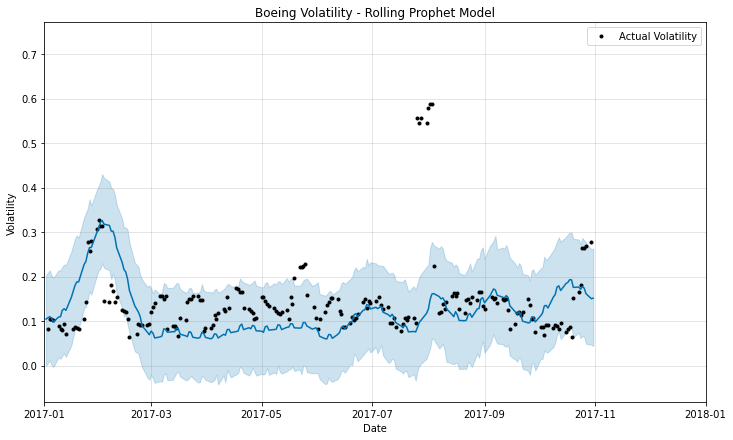

In [145]:
proph_model.plot(df2)
plt.plot(test['Hv10'], marker = '.', linestyle = 'None', color = 'black', label = 'Actual Volatility')
plt.xlim([datetime(2017, 1, 1), datetime(2018, 1, 1)])
plt.title('Boeing Volatility - Rolling Prophet Model')
plt.ylabel('Volatility')
plt.xlabel('Date')
plt.legend(loc = 'upper right')
plt.show()

In [147]:
test.set_index('Date', inplace = True)

In [148]:
Ptest = test
Ptest['ds'] = Ptest.index

Ptest = Ptest.reset_index()
Ptest = Ptest.drop(['Date'], axis =1)

merge1 = pd.merge(Ptest, df2, how = 'inner', on = 'ds')

In [149]:
rmse = sqrt(mean_squared_error(merge1['Hv10'],merge1['yhat']))
print('RMSE = \n', (rmse))
print('R squared = \n', (r2_score(merge1['Hv10'],merge1['yhat'])))
print('Upper and Lower Bounds for 90% Density: \n', np.percentile((merge1['Hv10']-merge1['yhat']), [5,95]))

RMSE = 
 0.10208858237019522
R squared = 
 -0.20596059584780302
Upper and Lower Bounds for 90% Density: 
 [-0.1061329   0.12782236]


The rolling prophet model falls short as the R-squared is negative. It is better than previous ones but falls short of the most recent ARIMA model. 

In [150]:
BA2.head()

,Hv10,ds,y
Date,,,
2013-09-03,0.2010,2013-09-03,0.2010
2013-09-04,0.2156,2013-09-04,0.2156
2013-09-05,0.2157,2013-09-05,0.2157
2013-09-06,0.1523,2013-09-06,0.1523
2013-09-09,0.1549,2013-09-09,0.1549


In [154]:
BA3 = BA2['Hv10']
BA3.head()

Date
2013-09-03    0.2010
2013-09-04    0.2156
2013-09-05    0.2157
2013-09-06    0.1523
2013-09-09    0.1549
Name: Hv10, dtype: float64

In [156]:
c = 840
forecasts10 = []

while c < 1088:
    model10 = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
    model10.fit(BA3.iloc[:c])
    forecast10 = model10.predict(n_periods=10)
    forecasts10.append(forecast10[9])
    c += 1
    
day10 = pd.DataFrame(forecasts10, columns=['Prediction'])    
day10.head()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.11 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.21 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.29 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.41 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.20 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.65 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.64 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.38 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.48 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.10 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.72 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.00 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.19 sec

Best model:  ARIMA(

 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.96 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.19 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.248 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.17 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.24 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.34 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.53 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.23 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.63 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.75 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.15 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.37 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.06 sec
 ARIMA(3,

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.16 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.37 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.06 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.71 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.24 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.19 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.195 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.00 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.26 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.49 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.10 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.63 sec
 ARIMA(1,

 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.12 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.63 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.72 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.73 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.58 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.40 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.95 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.34 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 11.800 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.08 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.26 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.40 sec
 ARIMA(0

 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.28 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.19 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.66 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.79 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.29 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.38 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=0.98 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.76 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.95 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.20 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.224 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.08 sec
 ARIMA(0,

 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.42 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.00 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.71 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.96 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.19 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.018 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.29 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.20 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.28 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.41 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.17 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.63 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.69 sec
 ARIMA(2,

 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.10 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.70 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.64 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.16 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.45 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=0.99 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.70 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.94 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.19 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.158 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=0.99 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.27 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.28 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.39 sec
 ARIMA(0

 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.54 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.28 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.42 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.69 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.93 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.87 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.79 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.50 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.37 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.92 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.31 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.23 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 13.001 seconds
Performing stepwise search to minimize aic
 ARIMA(2,

 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.19 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 9.883 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.08 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.26 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.41 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.38 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.62 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.64 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.24 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.38 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=0.97 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.78 sec
 ARIMA(3,0

 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.37 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=0.97 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.79 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.88 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.26 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.399 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.10 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.26 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.10 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.68 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.63 sec
 ARIMA(2,

 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.09 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.63 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.74 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.15 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.38 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.27 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.71 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.97 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.20 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.294 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.00 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.26 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.49 sec
 ARIMA(0

 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.52 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.14 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.65 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.77 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.22 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.42 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.06 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.73 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.06 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.28 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.434 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.11 sec
 ARIMA(0,

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.31 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.29 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.31 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.47 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.54 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.81 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.74 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.61 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.39 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.25 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.73 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.13 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(

 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.12 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.19 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.799 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.07 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.23 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.30 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.64 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.23 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.75 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.70 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.29 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.52 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.00 sec
 ARIMA(3,

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.18 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.44 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=0.99 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.73 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.93 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 9.960 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.24 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.32 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.47 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.14 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.71 sec
 ARIMA(1,0

 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.09 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.87 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.74 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.18 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.45 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=0.97 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.72 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.94 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.19 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.197 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.25 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.43 sec
 ARIMA(0

 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.26 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.19 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.88 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.80 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.34 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.37 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.06 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.72 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.97 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.19 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.520 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.07 sec
 ARIMA(0,

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.17 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.71 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.74 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.24 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.40 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.10 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.73 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.06 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.20 sec

Best model:  ARIMA(

 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.08 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.28 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.188 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.05 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.28 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.35 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.70 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.80 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.30 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.39 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.08 sec
 ARIMA(3,

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.18 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.47 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=0.97 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.72 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.97 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.19 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.003 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.28 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.25 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.13 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.66 sec
 ARIMA(1,

 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.46 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.63 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.70 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.19 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.37 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.07 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.70 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.95 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.19 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.699 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.26 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.47 sec
 ARIMA(0

 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.28 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.14 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.67 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.91 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.20 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.37 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.06 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.70 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.97 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.20 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.172 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=0.99 sec
 ARIMA(0,

 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.38 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.06 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.71 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.98 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.20 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.202 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.25 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.16 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.63 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.70 sec
 ARIMA(2,

 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.15 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.76 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.90 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.53 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.41 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.01 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.71 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=1.96 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.19 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.840 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.21 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.30 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.42 sec
 ARIMA(0

 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.31 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.37 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.49 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.57 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.90 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=1.15 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=2.09 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.55 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.36 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.98 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=3.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.28 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 14.646 seconds
Performing stepwise search to minimize aic
 ARIMA(2,

 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.30 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 11.402 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.18 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.30 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.33 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.43 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.23 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.70 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.81 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.38 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.40 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.06 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.78 sec
 ARIMA(3,

 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.42 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.14 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.78 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.14 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.21 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 11.275 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.23 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.20 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.34 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.70 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.15 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.36 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.81 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.73 sec
 ARIMA(2,

 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.31 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.69 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.76 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.33 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.42 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.18 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.77 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.40 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.38 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 11.657 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.28 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.21 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.30 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.44 sec
 ARIMA(0

 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.25 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.37 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.48 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.30 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.67 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.80 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.23 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.41 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.34 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.76 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-2900.576, Time=2.21 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.23 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 11.447 seconds
Performing stepwise search to minimize aic
 ARIMA(2,

 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2865.804, Time=0.23 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 11.225 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2901.971, Time=1.11 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1499.115, Time=0.28 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2898.411, Time=0.29 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2207.125, Time=0.45 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.876, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2903.857, Time=1.26 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2523.423, Time=0.73 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2905.828, Time=0.68 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2907.593, Time=1.35 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2906.037, Time=0.41 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-2902.142, Time=1.07 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-2904.215, Time=0.87 sec
 ARIMA(3,

,Prediction
0,0.173050
1,0.176109
2,0.181703
3,0.180858
4,0.179615


In [157]:
rolling = test
rolling = rolling.reset_index()
rolling['Pred'] = day10['Prediction']
rolling = rolling.set_index('Date')

In [158]:
rolling.head()

,Hv10,ds,Pred
Date,,,
2017-01-03,0.0821,2017-01-03,0.173050
2017-01-04,0.1052,2017-01-04,0.176109
2017-01-05,0.1049,2017-01-05,0.181703
2017-01-06,0.1031,2017-01-06,0.180858
2017-01-09,0.0885,2017-01-09,0.179615


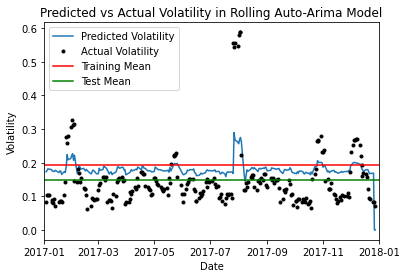

In [175]:
plt.plot(rolling['Pred'], label = 'Predicted Volatility')
plt.plot(rolling['Hv10'], marker = '.', linestyle = 'None', color = 'black', label = 'Actual Volatility')
plt.xlim([datetime(2017, 1, 1), datetime(2018, 1, 1)])
plt.axhline(0.194, color="red", label = 'Training Mean')
plt.axhline(0.148, color="green", label = 'Test Mean')
plt.legend(loc = 'upper left')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title('Predicted vs Actual Volatility in Rolling Auto-Arima Model')
plt.show()

In [174]:
rmse= sqrt(mean_squared_error(rolling['Hv10'],rolling['Pred']))
print('RMSE = \n', (rmse))
print('R squared = \n', (r2_score(rolling['Hv10'],rolling['Pred'])))
print('Upper and Lower Bounds for 90% Density:  \n', np.percentile((rolling['Hv10']-rolling['Pred']), [5,95]))

RMSE = 
 0.0799959577782868
R squared = 
 0.17370609845587082
Upper and Lower Bounds for 90% Density:  
 [-0.0916467   0.08051008]


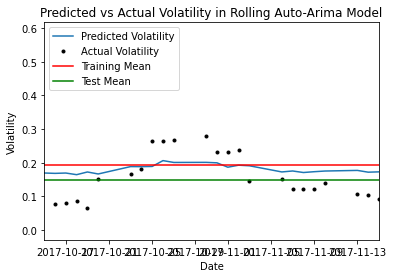

In [176]:
plt.plot(rolling['Pred'], label = 'Predicted Volatility')
plt.plot(rolling['Hv10'], marker = '.', linestyle = 'None', color = 'black', label = 'Actual Volatility')
plt.xlim([datetime(2017, 10, 15), datetime(2017, 11, 15)])
plt.axhline(0.194, color="red", label = 'Training Mean')
plt.axhline(0.148, color="green", label = 'Test Mean')
plt.legend(loc = 'upper left')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title('Predicted vs Actual Volatility in Rolling Auto-Arima Model')
plt.show()

In [177]:
late_rolling = rolling['2017-10-01':]
late_rolling.head()

,Hv10,ds,Pred
Date,,,
2017-10-02,0.0872,2017-10-02,0.167986
2017-10-03,0.0871,2017-10-03,0.167227
2017-10-04,0.0680,2017-10-04,0.172966
2017-10-05,0.0912,2017-10-05,0.168656
2017-10-06,0.0907,2017-10-06,0.175444


In [178]:
rmse= sqrt(mean_squared_error(late_rolling['Hv10'],late_rolling['Pred']))
print('RMSE = \n', (rmse))
print('R squared = \n', (r2_score(late_rolling['Hv10'],late_rolling['Pred'])))
print('Upper and Lower Bounds for 90% Density:  \n', np.percentile((late_rolling['Hv10']-late_rolling['Pred']), [5,95]))

RMSE = 
 0.06650239968262006
R squared = 
 0.057361661095059246
Upper and Lower Bounds for 90% Density:  
 [-0.0911115   0.07175541]


The rolling window on the auto-ARIMA model provides slightly disappointing results in terms of metrics. The RMSE and R-squared numbers are an improvement on the original baseline ARIMA model but fall short of any of the other models. On the positive side, The diagram above shows an example where this model makes several predictions that move in the correct direction and outperform the mean in the short term. If volatility were predicted on a shorter term than a ten day average, the model may have improved even more. 

Overall, the results of modeling 10 day volatility in Boeing stock were somewhat mixed. By implementing different types of models, adding regressors, and moving to a rolling forecast I was able to make significant improvements from the baseline model. On the downside, I was unable to produce a model that predicted the historical volatility with greater accuracy than the mean of the training set without overfitting to some of the days that were already included in the prediction set.